A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & 
all other variable will be independent in the analysis. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
threshold = df['Sales'].quantile(0.75)

In [7]:
df['High_sales'] = df['Sales'].apply(lambda x: 1 if x >= threshold else 0)

In [8]:
df = pd.get_dummies(df, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

In [9]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High_sales,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,1,1
1,11.22,111,48,16,260,83,65,10,1,1,0,1,1
2,10.06,113,35,10,269,80,59,12,1,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,0,1,1,1
4,4.15,141,64,3,340,128,38,13,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,0,1,1
396,6.14,139,23,3,37,120,55,11,0,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,1,1
398,5.94,100,79,7,284,95,50,12,0,0,0,1,1


In [10]:
X = df.drop(['Sales', 'High_sales'], axis=1)

In [11]:
y = df['High_sales']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [13]:
X_train

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
39,130,60,0,144,138,38,10,0,0,0,0
167,106,73,0,216,93,60,13,0,1,1,0
383,98,117,0,76,68,63,10,0,1,1,0
221,124,44,0,125,107,80,11,0,1,1,0
351,124,115,16,458,105,62,16,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
255,123,81,8,198,81,80,15,0,0,1,1
72,115,45,0,432,116,25,15,0,1,1,0
396,139,23,3,37,120,55,11,0,1,0,1
235,126,32,8,95,132,50,17,0,1,1,1


In [14]:
X_test

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
398,100,79,7,284,95,50,12,0,0,1,1
125,89,78,0,181,49,43,15,0,1,0,0
328,117,66,1,65,111,55,11,0,0,1,1
339,134,44,4,219,126,44,15,1,0,1,1
172,104,102,13,123,110,35,16,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
91,97,46,11,267,107,80,15,0,1,1,1
322,140,50,10,300,139,60,15,1,0,1,1
248,111,52,0,12,101,61,11,0,1,1,1
186,120,51,0,93,86,46,17,0,1,0,0


In [15]:
y_train

39     0
167    0
383    1
221    0
351    1
      ..
255    0
72     0
396    0
235    0
37     0
Name: High_sales, Length: 280, dtype: int64

In [16]:
y_test

398    0
125    1
328    0
339    1
172    0
      ..
91     0
322    0
248    0
186    0
395    1
Name: High_sales, Length: 120, dtype: int64

In [17]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.9083333333333333
Precision: 0.8421052631578947
Recall: 0.6666666666666666
F1-score: 0.744186046511628


In [18]:
high_sale = pd.DataFrame({'Feature': X.columns, 'High_Sale': rf.feature_importances_}).sort_values('High_Sale', ascending=False)

In [19]:
high_sale = high_sale.sort_values('High_Sale', ascending=False)

In [20]:
high_sale

,Feature,High_Sale
4,Price,0.219854
7,ShelveLoc_Good,0.141399
2,Advertising,0.127678
5,Age,0.109915
0,CompPrice,0.099963
1,Income,0.092464
3,Population,0.087310
6,Education,0.057013
8,ShelveLoc_Medium,0.028977
10,US_Yes,0.023657


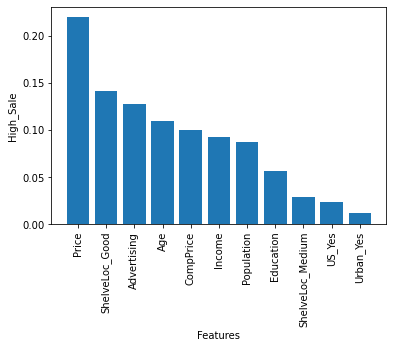

In [21]:
plt.bar(high_sale['Feature'], high_sale['High_Sale'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('High_Sale')
plt.show()